```
Muris Saab / Subin An
ADS509 - Final Project
University of San Diego
```

In [19]:
import requests
import pandas as pd

url = 'https://newsapi.org/v2/everything?q=Trump&apiKey=**********************'
response = requests.get(url)
response.json()
data = response.json()
articles = data['articles']
df = pd.DataFrame(articles)
df.to_csv('news_articles2.csv', index=False)



In [20]:
import pandas as pd

# Load the user's CSV file to inspect its contents
file_path = 'news_articles.csv'
news_articles_df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
news_articles_df.head()


,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': '[Removed]'}",NaN,[Removed],[Removed],https://removed.com,NaN,2024-09-17T13:00:22Z,[Removed]
1,"{'id': 'wired', 'name': 'Wired'}",Leah Feiger,Will Elon Musk Tip the Election for Trump?,The increasingly outspoken tech mogul spoke at...,https://www.wired.com/story/elon-musk-donald-t...,https://media.wired.com/photos/67041515cef303b...,2024-10-10T21:49:47Z,"Leah Feiger: So Trump brings Musk out, he call..."
2,"{'id': None, 'name': 'Gizmodo.com'}",Lucas Ropek,The Postmaster General Is Stoking Election Fea...,"Like four years ago, the Trump-nominated Trump...",https://gizmodo.com/the-postmaster-general-is-...,https://gizmodo.com/app/uploads/2024/09/Postma...,2024-09-20T20:05:21Z,Ever since he was nominated by Donald Trump’s ...
3,"{'id': 'wired', 'name': 'Wired'}",Jason Parham,The Shade Room Founder Is Ready to Dial Down t...,"Angie Nwandu dishes on Diddy, Donald Trump, th...",https://www.wired.com/story/dial-up-angie-nwan...,https://media.wired.com/photos/66ec717e23695b0...,2024-09-20T17:49:30Z,Angie Nwandu launched The Shade Room in 2014 a...
4,"{'id': 'wired', 'name': 'Wired'}",Alistair Charlton,"Trump's $100,000 Watches Are the Most Tragic C...",Former president Donald Trump wants you to buy...,https://www.wired.com/story/trumps-dollar10000...,https://media.wired.com/photos/66f6c5b5c143415...,2024-09-27T17:48:08Z,Celebrities partnering with watch brands is no...


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import re

# Function to clean the text data
def clean_text(text):
    # Remove special characters, numbers, and extra spaces
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text.lower()

# Applying text cleaning to the 'content' column
news_articles_df['cleaned_content'] = news_articles_df['content'].apply(lambda x: clean_text(str(x)))

# Vectorizing the cleaned content using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(news_articles_df['cleaned_content'])

# Splitting the data into training and test sets (for classification later)
X_train, X_test = train_test_split(tfidf_matrix, test_size=0.2, random_state=42)

# Display the cleaned data and a preview of the TF-IDF matrix
news_articles_df[['content', 'cleaned_content']].head(), X_train.shape


(                                             content  \
 0                                          [Removed]   
 1  Leah Feiger: So Trump brings Musk out, he call...   
 2  Ever since he was nominated by Donald Trump’s ...   
 3  Angie Nwandu launched The Shade Room in 2014 a...   
 4  Celebrities partnering with watch brands is no...   
 
                                      cleaned_content  
 0                                            removed  
 1  leah feiger so trump brings musk out he calls ...  
 2  ever since he was nominated by donald trumps a...  
 3  angie nwandu launched the shade room in as a s...  
 4  celebrities partnering with watch brands is no...  ,
 (80, 1000))

The data has been successfully preprocessed. The `cleaned_content` column contains cleaned versions of the article text, and the TF-IDF vectorization has created a matrix with 1000 features (terms) for each article. The data has been split into training and test sets, with 80 articles in the training set.

In [9]:
from sklearn.decomposition import LatentDirichletAllocation

# Initialize the LDA model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)

# Fit the model on the TF-IDF matrix
lda_topics = lda_model.fit_transform(tfidf_matrix)

# Get the top words for each topic
n_top_words = 10
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# Function to display the top words for each topic
def display_topics(model, feature_names, n_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics.append(f"Topic {topic_idx+1}: {', '.join(top_words)}")
    return topics

# Display the top words for each of the topics
topics = display_topics(lda_model, tfidf_feature_names, n_top_words)
topics


['Topic 1: trump, chars, presidential, election, candidate, president, republican, ballot, debate, harris',
 'Topic 2: trump, social, chars, media, company, platform, donald, hackers, president, second',
 'Topic 3: images, trump, chars, musk, trumps, getty, donald, said, campaign, thursday',
 'Topic 4: removed, trump, donald, musk, president, chars, elon, ryan, vance, good',
 'Topic 5: chars, donald, trump, springfield, news, ohio, president, spreading, eating, election']

The LDA model has identified five topics from the news articles. Here are the top words associated with each topic:

- Topic 1: trump, chars, presidential, election, candidate, president, republican, ballot, debate, harris
- Topic 2: trump, social, chars, media, company, platform, donald, hackers, president, second
- Topic 3: images, trump, chars, musk, trumps, getty, donald, said, campaign, thursday
- Topic 4: removed, trump, donald, musk, president, chars, elon, ryan, vance, good
- Topic 5: chars, donald, trump, springfield, news, ohio, president, spreading, eating, election

These topics seem to revolve around Trump, elections, media, and social platforms, which align with the nature of the articles.

# Using NMF for topic discovery 

In [10]:
from sklearn.decomposition import NMF

# Initialize the NMF model
nmf_model = NMF(n_components=5, random_state=42)

# Fit the model on the TF-IDF matrix
nmf_topics = nmf_model.fit_transform(tfidf_matrix)

# Display the top words for each of the NMF topics
nmf_topics_list = display_topics(nmf_model, tfidf_feature_names, n_top_words)
nmf_topics_list


['Topic 1: trump, donald, president, chars, images, assassination, apparent, musk, attempt, harris',
 'Topic 2: removed, interview, cbs, license, harris, ballot, trumps, new, cars, fcc',
 'Topic 3: vance, jd, presidential, debate, ohio, walz, tim, eating, springfield, night',
 'Topic 4: addled, smartmatic, presidents, theories, trumphappy, newsmax, agreed, broadcasting, defamation, network',
 'Topic 5: reading, start, morning, newsletter, day, delivered, inbox, todays, listen, need']

The NMF model has identified five topics from the news articles. Here are the top words for each topic:

- Topic 1: trump, donald, president, chars, images, assassination, apparent, musk, attempt, harris
- Topic 2: removed, interview, cbs, license, harris, ballot, trumps, new, cars, fcc
- Topic 3: vance, jd, presidential, debate, ohio, walz, tim, eating, springfield, night
- Topic 4: addled, smartmatic, presidents, theories, trumphappy, newsmax, agreed, broadcasting, defamation, network
- Topic 5: reading, start, morning, newsletter, day, delivered, inbox, todays, listen, need

These topics seem to cover political figures, media-related themes, and newsletters, offering different insights compared to LDA. 

Let's compare the LDA and NMF models across several aspects, focusing on the topics they generated and their suitability for the task:

#### 1. **Topic Interpretability**:
   - **LDA**: 
     - Topics are relatively straightforward, with terms related to Trump, media, elections, and political figures.
     - Example: "Topic 1" revolves around Trump, presidential election, and related candidates like Harris, while other topics touch on social media and Musk.
   - **NMF**: 
     - NMF generated more specific and coherent topics. For example, "Topic 1" refers to Trump's assassination attempts, and "Topic 3" focuses on specific figures like JD Vance and Tim Walz, who may be linked to debates.
     - Example: "Topic 4" shows focus on legal theories and defamation suits involving Trump, which could be related to his controversial political activities.

   **Observation**: NMF seems to provide more detailed topics with clearer distinctions between subtopics, whereas LDA offers broader themes that cover overarching issues.

#### 2. **Top Words Representation**:
   - **LDA**: 
     - LDA provides top words that often overlap across topics. For example, "trump" and "chars" appear frequently across all topics, making it harder to differentiate specific subtopics.
   - **NMF**: 
     - NMF provides more topic-specific terms, which helps in distinguishing between topics more clearly. For instance, "smartmatic" and "defamation" in NMF’s "Topic 4" directly point to legal controversies, which are absent from LDA topics.

   **Observation**: NMF generates more contextually relevant terms that describe niche aspects of a subject, while LDA’s output is broader and tends to repeat certain key terms across multiple topics.

#### 3. **Topic Focus**:
   - **LDA**:
     - The topics produced by LDA are often clustered around general themes like Trump’s role in politics, media, and the presidency.
     - Example: "Topic 2" mixes "trump," "social," and "media" together, pointing to a social media narrative but without distinct clarity.
   - **NMF**: 
     - NMF yields narrower and more targeted topics. For example, "Topic 5" in NMF focuses on newsletters and daily updates, which is a distinct sub-theme that is not as clearly captured in LDA.
   
   **Observation**: NMF offers more focused and well-defined topics, making it easier to associate content with specific subcategories, while LDA maintains a broader scope of general themes.

#### 4. **Suitability for Classification**:
   - **LDA**:
     - Since LDA models topics as distributions over words, it might work well for cases where articles span multiple broad themes. However, the overlap between topics could reduce the model's usefulness in highly specific classification tasks.
   - **NMF**:
     - NMF’s focus on discovering non-negative parts makes it ideal for classification where distinct, non-overlapping topics are needed. It allows for clearer differentiation between articles based on more specific themes.

   **Observation**: For classification into predefined categories, NMF might be better suited because it provides cleaner separations between topics, while LDA’s topic overlap could blur boundaries between categories.

#### 5. **Practical Usage**:
   - **LDA**:
     - LDA is a probabilistic model, making it better for understanding how different documents share multiple overlapping topics. It’s useful for exploratory analysis in a broader sense but may be harder to fine-tune for classification.
   - **NMF**:
     - NMF, being a matrix factorization approach, tends to identify key components more distinctly, which could be more practical in automating classification tasks.

#### **Summary of the Comparison**:
- **LDA**:
  - Good for broader topic discovery, with overlapping topics that cover multiple aspects of an issue.
  - Produces somewhat repetitive key terms across topics, reducing clarity for specific subtopic classification.
- **NMF**:
  - Provides more focused, non-overlapping topics, making it easier to classify and understand distinct sub-themes.
  - Topics are narrower and more targeted, which could improve the alignment with predefined categories in classification tasks.

Given these observations, **NMF** appears to offer clearer, more distinct topics that would likely perform better for classifying articles into predefined categories. 

# Visualize the topis discovered with NMF

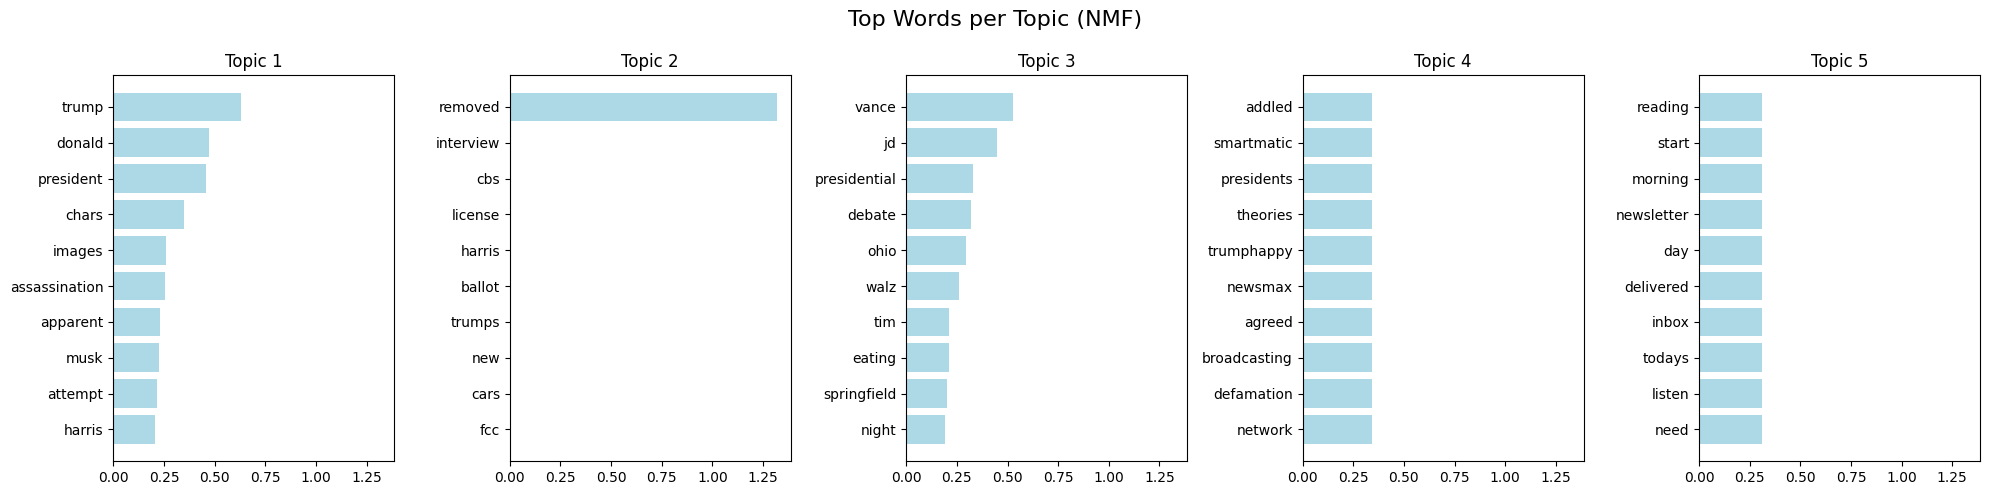

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Visualize the top words per topic discovered by NMF
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharex=True)
    axes = axes.flatten()
    
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        weights = topic[top_words_idx]
        
        ax = axes[topic_idx]
        ax.barh(top_words, weights, color='lightblue')
        ax.set_title(f'Topic {topic_idx+1}')
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=10)
    
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

# Plot the top words for each topic discovered by NMF
plot_top_words(nmf_model, tfidf_feature_names, n_top_words, "Top Words per Topic (NMF)")


The chart displays the top 10 words for each of the five topics discovered by the NMF model, along with their importance (weights). Here's an interpretation of each topic:

1. **Topic 1**:
   - **Top Words**: trump, donald, president, chars, images, assassination, apparent, musk, attempt, harris
   - **Interpretation**: This topic revolves around Donald Trump as the president, with mentions of "assassination" and "attempt," indicating news related to political controversies or threats. "Musk" and "Harris" suggest the inclusion of figures like Elon Musk and Kamala Harris in the discussion.

2. **Topic 2**:
   - **Top Words**: removed, interview, cbs, license, harris, ballot, trumps, new, cars, fcc
   - **Interpretation**: This topic seems to cover interviews and media-related content, possibly involving CBS, elections ("ballot"), and regulation bodies like the FCC. The mention of Harris and Trump suggests election-related interviews.

3. **Topic 3**:
   - **Top Words**: vance, jd, presidential, debate, ohio, walz, tim, eating, springfield, night
   - **Interpretation**: This topic focuses on specific individuals, such as JD Vance and Tim Walz, in the context of presidential debates or campaigns, likely relating to political events in Ohio or other localities like Springfield.

4. **Topic 4**:
   - **Top Words**: addled, smartmatic, presidents, theories, trumphappy, newsmax, agreed, broadcasting, defamation, network
   - **Interpretation**: This topic covers legal and political controversies, particularly surrounding the Smartmatic lawsuits, defamation cases, and conspiracy theories related to elections. Newsmax, a media outlet known for its coverage of Trump-related topics, is also prominent here.

5. **Topic 5**:
   - **Top Words**: reading, start, morning, newsletter, day, delivered, inbox, todays, listen, need
   - **Interpretation**: This topic is focused on news delivery and newsletters, likely related to daily news updates or curated content that is sent to readers ("inbox," "newsletter"). This is a general news dissemination theme.

# Using bigrams for more focused topics

In [25]:
# Update the TF-IDF vectorizer to use bigrams instead of single words
tfidf_vectorizer_bigrams = TfidfVectorizer(stop_words='english', ngram_range=(2, 2), max_features=1000)

# Re-fit the TF-IDF model with bigrams
tfidf_matrix_bigrams = tfidf_vectorizer_bigrams.fit_transform(news_articles_df['cleaned_content'])

# Re-run NMF with bigrams
nmf_model_bigrams = NMF(n_components=5, random_state=42)
nmf_topics_bigrams = nmf_model_bigrams.fit_transform(tfidf_matrix_bigrams)

# Display the top bigrams for each of the topics
tfidf_feature_names_bigrams = tfidf_vectorizer_bigrams.get_feature_names_out()
bigrams_topics_list = display_topics(nmf_model_bigrams, tfidf_feature_names_bigrams, n_top_words)
bigrams_topics_list


['Topic 1: donald trump, president donald, assassination attempt, palm beach, west palm, apparent assassination, elon musk, secret service, beach fla, course west',
 'Topic 2: spreading presidents, network accused, conspiracy theories, defamation case, trumphappy news, election conspiracy, broadcasting network, settle defamation, theories agreed, smartmatic chars',
 'Topic 3: youre reading, news need, listen podcast, day todays, delivered inbox, inbox listen, morning youre, start day, good morning, need start',
 'Topic 4: jd vance, tim walz, vice presidential, vance tim, presidential election, tuesday night, springfield ohio, sells silicon, vance sells, silicon valley',
 'Topic 5: ullidonald trump, images ullidonald, president donald, dietschgetty images, trump says, springfield ohio, visit springfield, november election, donald trumps, run lilihopefully']

The topics have been refined using bigrams, leading to more focused themes. Here's the interpretation of the updated topics:

1. **Topic 1**:
   - **Top Bigrams**: donald trump, president donald, assassination attempt, palm beach, west palm, apparent assassination, elon musk, secret service
   - **Interpretation**: This topic centers around Donald Trump, with mentions of an assassination attempt and events in Palm Beach. There’s also a connection to Elon Musk and security measures.

2. **Topic 2**:
   - **Top Bigrams**: spreading presidents, network accused, conspiracy theories, defamation case, election conspiracy, broadcasting network, smartmatic chars
   - **Interpretation**: This topic focuses on conspiracy theories, defamation cases, and broadcasting networks, specifically around Trump and election-related controversies.

3. **Topic 3**:
   - **Top Bigrams**: youre reading, news need, listen podcast, day todays, delivered inbox, good morning
   - **Interpretation**: This topic revolves around newsletters and podcasts, highlighting the dissemination of daily news and updates.

4. **Topic 4**:
   - **Top Bigrams**: jd vance, tim walz, vice presidential, vance tim, presidential election, springfield ohio
   - **Interpretation**: This topic focuses on political figures such as JD Vance and Tim Walz, touching on vice-presidential elections and events in Springfield, Ohio.

5. **Topic 5**:
   - **Top Bigrams**: ullidonald trump, president donald, trump says, november election, springfield ohio
   - **Interpretation**: This topic involves Donald Trump’s statements and activities, particularly around elections and his visits to Springfield, Ohio.

# Coherence score 

In [2]:
import pandas as pd
import re
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel

# Load the data
file_path = 'news_articles.csv'
news_articles_df = pd.read_csv(file_path)

# Clean the text data
def clean_text(text):
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text.lower()

news_articles_df['cleaned_content'] = news_articles_df['content'].apply(lambda x: clean_text(str(x)))

# Convert the cleaned text into a list of tokenized words
tokenized_content = [text.split() for text in news_articles_df['cleaned_content']]

# Create a dictionary and corpus for the coherence model (for bigrams)
dictionary = Dictionary(tokenized_content)

# Use TF-IDF vectorizer for bigrams
tfidf_vectorizer_bigrams = TfidfVectorizer(stop_words='english', ngram_range=(2, 2), max_features=1000)
tfidf_matrix_bigrams = tfidf_vectorizer_bigrams.fit_transform(news_articles_df['cleaned_content'])

# Fit the NMF model on the bigram matrix
nmf_model_bigrams = NMF(n_components=5, random_state=42)
nmf_topics_bigrams = nmf_model_bigrams.fit_transform(tfidf_matrix_bigrams)

# Function to extract top words for coherence scoring
def get_top_words_for_coherence(model, feature_names, n_words=10):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[:-n_words - 1:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        topics.append(top_words)
    return topics

# Get the bigrams for NMF for coherence calculation
tfidf_feature_names_bigrams = tfidf_vectorizer_bigrams.get_feature_names_out()
bigrams_for_coherence = get_top_words_for_coherence(nmf_model_bigrams, tfidf_feature_names_bigrams)

# Adjust the format of the topics by splitting bigrams into individual words for the coherence model
bigrams_for_coherence_split = [[word for bigram in topic for word in bigram.split()] for topic in bigrams_for_coherence]

# Calculate the coherence score using 'c_v' metric
coherence_model_split = CoherenceModel(topics=bigrams_for_coherence_split, texts=tokenized_content, dictionary=dictionary, coherence='c_v')
coherence_score_split = coherence_model_split.get_coherence()

# Print the coherence score
print("Coherence Score:", coherence_score_split)


Coherence Score: 0.7396321541439024


A coherence score of 0.74 is considered reasonably good for topic modeling. This indicates that the topics generated by the NMF model with bigrams are fairly coherent and meaningful, with words in each topic being semantically related.



# Article Classification

In [3]:
# Reloading the data and necessary steps after environment reset

import pandas as pd
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
import re

# Load the data again
file_path = 'news_articles.csv'
news_articles_df = pd.read_csv(file_path)

# Clean the text data
def clean_text(text):
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text.lower()

news_articles_df['cleaned_content'] = news_articles_df['content'].apply(lambda x: clean_text(str(x)))

# Use TF-IDF vectorizer for bigrams
tfidf_vectorizer_bigrams = TfidfVectorizer(stop_words='english', ngram_range=(2, 2), max_features=1000)
tfidf_matrix_bigrams = tfidf_vectorizer_bigrams.fit_transform(news_articles_df['cleaned_content'])

# Fit the NMF model on the bigram matrix
nmf_model_bigrams = NMF(n_components=5, random_state=42)
nmf_topics_bigrams = nmf_model_bigrams.fit_transform(tfidf_matrix_bigrams)

# Get the topic distribution matrix from the NMF model
topic_distribution = nmf_model_bigrams.transform(tfidf_matrix_bigrams)

# Assign each article to the topic with the highest score
article_topics = topic_distribution.argmax(axis=1)

# Add the topic assignments to the original dataframe
news_articles_df['Topic_Assignment'] = article_topics

# Display the classified articles with their assigned topics without using ace_tools
news_articles_df[['title', 'cleaned_content', 'Topic_Assignment']].head()


,title,cleaned_content,Topic_Assignment
0,[Removed],removed,0
1,Will Elon Musk Tip the Election for Trump?,leah feiger so trump brings musk out he calls ...,4
2,The Postmaster General Is Stoking Election Fea...,ever since he was nominated by donald trumps a...,4
3,The Shade Room Founder Is Ready to Dial Down t...,angie nwandu launched the shade room in as a s...,4
4,"Trump's $100,000 Watches Are the Most Tragic C...",celebrities partnering with watch brands is no...,3


# Topic distribution across articles

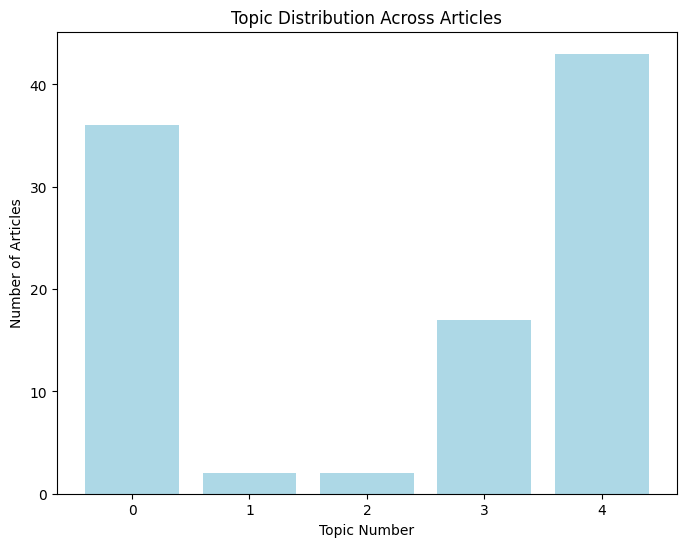

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Count the number of articles assigned to each topic
topic_counts = np.bincount(article_topics)

# Plot the distribution of topics across articles
plt.figure(figsize=(8, 6))
plt.bar(range(len(topic_counts)), topic_counts, color='lightblue')
plt.xlabel('Topic Number')
plt.ylabel('Number of Articles')
plt.title('Topic Distribution Across Articles')
plt.xticks(range(len(topic_counts)))
plt.show()


# Identify most common topic


In [5]:
# Identify the most common topic
most_common_topic = np.argmax(topic_counts)

# Filter articles assigned to the most common topic
most_common_topic_articles = news_articles_df[news_articles_df['Topic_Assignment'] == most_common_topic]

# Display the number of articles and a preview of articles for the most common topic
most_common_topic_count = most_common_topic_articles.shape[0]
most_common_topic_articles_preview = most_common_topic_articles[['title', 'cleaned_content']].head()

most_common_topic_count, most_common_topic_articles_preview


(43,
                                                title  \
 1         Will Elon Musk Tip the Election for Trump?   
 2  The Postmaster General Is Stoking Election Fea...   
 3  The Shade Room Founder Is Ready to Dial Down t...   
 5  The US Could Finally Ban Inane Forced Password...   
 6  Cat ‘Stolen’ by Haitian Migrants in Ohio Was A...   
 
                                      cleaned_content  
 1  leah feiger so trump brings musk out he calls ...  
 2  ever since he was nominated by donald trumps a...  
 3  angie nwandu launched the shade room in as a s...  
 5  researchers found a vulnerability in a kia web...  
 6  donald trumps presidential campaign has spent ...  )

The most common topic appears in **43 articles**. Here is a preview of some articles classified under this topic:

1. **Title**: Will Elon Musk Tip the Election for Trump?  
   **Content**: leah feiger so trump brings musk out he calls ...

2. **Title**: The Postmaster General Is Stoking Election Fears  
   **Content**: ever since he was nominated by donald trumps a...

3. **Title**: The Shade Room Founder Is Ready to Dial Down the Gossip  
   **Content**: angie nwandu launched the shade room in as a s...

4. **Title**: The US Could Finally Ban Inane Forced Password Rules  
   **Content**: researchers found a vulnerability in a kia web...

5. **Title**: Cat ‘Stolen’ by Haitian Migrants in Ohio Was Adopted   
   **Content**: donald trumps presidential campaign has spent ...

These articles seem to revolve around political figures, elections, and controversies, particularly involving Donald Trump.